## Business Understanding

In diesem Schritt wird der Zweck des Projekts definiert. Es sollte richtig bestimmt werden, indem mit allen Projektbeteiligten besprochen wird, was das Hauptziel des Projekts ist, und dann dem Projektsponsor die Hand geschüttelt wird. In Fällen wie Missverständnissen oder Missverständnissen treten in Zukunft große Probleme auf, da dieser Schritt die Grundlage für Data Mining bildet. Unser Ziel ist es, die Daten offenzulegen, die Aufschluss darüber geben, welche Kunden das neue Produkt der Bank, BF1Card, im Lichte der Daten, die wir von der Bank erhalten haben, mit der wir zusammenarbeiten, verkaufen können. Entsprechend dem Ergebnis dieses Prozesses wird die Bank die Werbezielgruppe usw. umsetzen.

Projenin amacı bu adımda tanımlanır.
Projenin ana hedefinin ne olduğunu tüm proje paydaşlarıyla görüşüp akabinde proje sponsoru ile el sıkışarak doğru bir şekilde belirlenmelidir.
Yanlış anlaşılma veya düzgün anlaşılmama gibi durumlarda ileride büyük sıkıntılar ortaya çıkar çünkü bu adım data mining işleminin temelidir.
Bizim amacımız ise çalıştığımız bankadan almış olduğumuz veriler eşliğinde bankanın yeni ürünü olan BF1Kart'ı hangi müşterilere satabilecekleri konusunda bilgi veren verileri açığa çıkartmaktır. Bu işlemin sonucuna göre banka reklam hedef kitlesini vb şeylerini hayata geçirecektir.

## Data Understanding

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
csv_url = ('https://raw.githubusercontent.com/sarp-u/csv/main/bank_marketing_adal_v1.0%20(1).csv')
df = pd.read_csv(csv_url, sep= ';', decimal= ',')
print(df.shape)

(20493, 10)


Hier haben wir die Bibliotheken importiert, die wir zur Analyse der Daten benötigen. Dann haben wir unsere CSV-Datei aus Github gezogen und in die Variable df eingefügt und uns angesehen, aus wie vielen Spalten und Zeilen unsere CSV-Datei besteht.

Burada datayı analiz etmemiz için gerekli kütüphaneleri importladık. Daha sonrasında github'dan csv dosyamızı çekip df adlı variable'ın içine koyduk ve csv dosyamızın kaç sütun ve satırdan oluştuğna baktık

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20493 entries, 0 to 20492
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Alter          20493 non-null  int64 
 1   Beruf          20493 non-null  object
 2   Familienstand  20493 non-null  object
 3   Ausbildung     20493 non-null  object
 4   Ausgefallen    20493 non-null  int64 
 5   Kontostand     20493 non-null  int64 
 6   Eigentum       20493 non-null  int64 
 7   Darlehen       20493 non-null  int64 
 8   Dauer          20493 non-null  int64 
 9   Label          20493 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.6+ MB


Unser erster Schritt besteht darin, die Informationen der Daten zu erhalten, an denen wir arbeiten. Wir beobachten also unsere Spalten und die Arten von Werten, die die Spalten haben.

İlk adımımız çalıştığımız datanın infosunu almak. Böylece Sütunlarımızı ve sütunların sahip olduğu değerlerin türlerini gözlemleriz

In [ ]:
df.shape

(20493, 10)

Beachten Sie die Anzahl der Spalten und Zeilen.

Sütun ve satır sayısını gözlemleme

In [ ]:
df.head()

,Alter,Beruf,Familienstand,Ausbildung,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label
0,31,Freiberufler,verheiratet,Allgemeine Hochschulreife,0,162,1,1,0,1
1,28,Beamter,verheiratet,Allgemeine Hochschulreife,0,1595,0,0,1,0
2,39,Techniker,geschieden,Allgemeine Hochschulreife,0,17441,1,1,1,1
3,54,Arbeitslos,geschieden,Allgemeine Hochschulreife,0,925,0,0,2,0
4,24,Techniker,ledig,Allgemeine Hochschulreife,0,-156,1,0,4,0


Wir haben die Funktion .head () verwendet, um die Daten, an denen wir arbeiten, zu beobachten und die darin enthaltenen Werte zu betrachten.

Çalıştığımız datayı gözlemlemek ve içindeki değerlere bakmak için .head() fonksiyonunu kullandık

In [ ]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Alter,20493,NaN,NaN,NaN,39.4865,10.3343,18,32,37,47,69
Beruf,20493,11,unbekannt,4535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Familienstand,20493,3,verheiratet,11173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ausbildung,20493,4,Allgemeine Hochschulreife,10522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ausgefallen,20493,NaN,NaN,NaN,0.0114673,0.106472,0,0,0,0,1
Kontostand,20493,NaN,NaN,NaN,1428.93,2378.8,-4057,141,561,1640,19985
Eigentum,20493,NaN,NaN,NaN,0.567852,0.495387,0,0,1,1,1
Darlehen,20493,NaN,NaN,NaN,0.132338,0.338866,0,0,0,0,1
Dauer,20493,NaN,NaN,NaN,298.072,291.22,0,113,204,372,2456
Label,20493,NaN,NaN,NaN,0.237789,0.425739,0,0,0,0,1


Wir verwenden diesen Schritt, um bessere Informationen über die Daten zu erhalten, mit denen wir arbeiten. Somit können wir leicht Werte wie Standardabweichung, Mittelwert min und max für ganzzahlige Werte sehen. Für Zeichenfolgenwerte können wir Dinge wie das am häufigsten verwendete Objekt und seine Häufigkeit finden. Im Allgemeinen können wir beispielsweise erreichen, welcher Wert in unserem Datensatz wie oft verwendet wird.

Çalıştığımız veri hakkında daha iyi bilgi almak için bu adımı kullanırız. Böylelikle integer değerler için standart sapma, ortalama değer min ve max gibi değerleri kolaylıkla görebiliriz. String değerleri için ise en çok kullanılan şeyi ve sıklığı gibi şeylere ulaşabiliriz. Genel olarak ise hangi değer data setimizde kaç kere kullanılmış vb şeylere ulaşırız.

In [ ]:
df.sort_values(by = ['Alter','Kontostand'], ascending = True)

,Alter,Beruf,Familienstand,Ausbildung,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label
6149,18,Student,ledig,unbekannt,0,3,0,0,130,1
6931,18,Student,ledig,Allgemeine Hochschulreife,0,5,0,0,143,0
4533,18,Student,ledig,unbekannt,0,35,0,0,104,0
3779,18,Student,ledig,unbekannt,0,108,0,0,92,1
8375,18,Student,ledig,unbekannt,0,108,0,0,167,1
...,...,...,...,...,...,...,...,...,...,...
6685,69,Rentner,geschieden,Allgemeine Hochschulreife,0,4189,0,0,138,0
7155,69,Rentner,geschieden,Allgemeine Hochschulreife,0,4572,0,0,146,0
9377,69,Rentner,geschieden,Allgemeine Hochschulreife,0,4572,0,0,185,0
20474,69,Rentner,geschieden,Allgemeine Hochschulreife,0,6850,0,0,2055,0


Sortierung in aufsteigender Reihenfolge nach Alter und Geldbetrag auf der Bank

Artan sırayla yaş ve bankadaki para miktarına göre sıralama

In [ ]:
duplicate_rows_data = df[df.duplicated()]
duplicate_rows_data

,Alter,Beruf,Familienstand,Ausbildung,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label
3804,33,unbekannt,verheiratet,Hochschulabschluss,0,1390,0,0,92,0
4152,30,Servicekraft,ledig,Allgemeine Hochschulreife,0,438,1,0,98,0
8123,39,Beamter,ledig,Allgemeine Hochschulreife,0,782,1,0,162,0


In [ ]:
df = df.drop_duplicates()

Wir müssen die wiederholten Linien finden und subtrahieren.

Tekrarlanan satırları bulup, bu satırları çıkarmamız gerekli



In [ ]:
df.isnull().values.any()

False

Wir haben nachgesehen, ob unsere Daten in irgendeiner Weise leer sind. Wenn sie false zurückgeben, sehen wir, dass es in keiner Weise einen Nano- oder Nullwert gibt.

Verilerimizin içerisinde herhangi bir şekilde boş bir kısım olup olmadığına baktık eğer false dönerse herhangi bir şekilde nan veya null değeri olmadığını görürüz.

In [ ]:
#df.dropna(inplace = True)

Wie wir im obigen Code sehen können, enthält unser Code keinen Null- oder NaN-Wert. Wenn es jedoch gefunden wird, können wir diese Daten nicht verarbeiten und es kann später zu Problemen kommen. Daher besteht eine der Methoden, die durchgeführt werden können, darin, diese Werte nicht zu verringern.

Yukarıdaki kodda gördüğümüz üzere kodumuzda herhangi bir şekilde null veya NaN değerinde herhangi bir şey bulunmamakta. Ancak bulunduğu takdirde bu verileri işleme katamıyoruz ve daha sonrasında sıkıntılar çıkarabiliyor. Bu yüzden yapılabilecek yöntemlerden birisi bu değerleri düşürerek işleme almamaktır.

In [ ]:
#df['Alter'].replace(np.NaN,df['Alter'].mean()).tail()

Nehmen wir erneut hypothetisch an, dass in unserer Spalte "Alter" Werte fehlen. Ein anderer Ansatz besteht darin, neue Werte zuzuweisen, anstatt diese Werte zu löschen. In diesem Fall besteht der beste Ansatz darin, einen der Mittel-, Median- oder Moduswerte auszuwählen. Auch hier ersetzen wir die Linien in NaN-Werten durch das Durchschnittsalter.

Yine varsayımsal olarak Yaş sütunumuzda eksik değerler olduğunu varsayalım. Bir diğer yaklaşım ise bu değerleri silmek yerine yerine yeni değerler atamaktır. Bu durumda yapılabilecek en iyi yaklaşım ortalama, medyan veya mod değerlerinden birisini seçmektir. Burada da yaptığımız işlem NaN değerindeki satırları yaş ortalaması ile değiştirmektir.

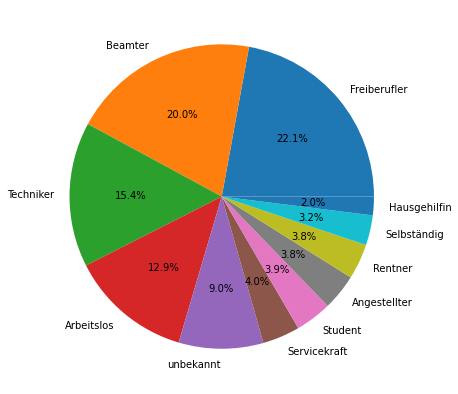

In [ ]:
berufs = df['Beruf'].unique()
data = df['Beruf'].value_counts()
fig = plt.figure(figsize =(12, 7)) 
plt.pie(data, autopct='%1.1f%%', labels = berufs)
plt.show()


Wir addieren den Wert jeder einzelnen Arbeit in diesem Datensatz zu unserem Berufswert. In unserem Datenwert finden wir heraus, wie viele Personen in jedem Beruf sind. Wenn wir diese Daten, die wir später erhalten haben, in unseren Befehl einfügen, der das Kreisdiagramm zeichnet, wird das gezeigte Ergebnis erhalten. Anhand dieses Kreisdiagramms können wir leicht erkennen, welchem ​​Beruf die Mehrheit der Personen mit Bankkonten angehört.


Berufs değerimizin içerisine bu data setteki her bir farklı iş değerini atıyoruz. Data değerimizde ise her bir meslekte kaç kişinin olduğuna ulaşırız. Daha sonrasında elde ettiğimiz bu verileri pasta grafiğini çizecek olan komutumuzu içersine yerleştirdiğimizde de gösterilen sonuç ortaya çıkar. Bu pasta grafiğine bakarak banka hesabı olan kişilerin çoğunluğunun hangi meslek grubundan olduğunu kolayca görebiliriz.

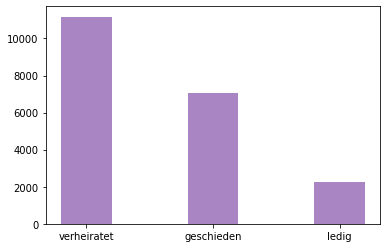

In [ ]:
familienstand = df['Familienstand'].unique()
data = df['Familienstand'].value_counts()
y_pos = np.arange(len(familienstand))
plt.bar(y_pos, data, align='center', alpha=0.5, width= 0.4, color ='#540c8a')
plt.xticks(y_pos, familienstand)
plt.show()

Zunächst müssen wir herausfinden, welche Werte die Daten sind, die wir zeichnen werden, und wie viele Werte. Hier sehen wir, welche Werte in einem mit Familien- und Datenwerten enthalten sind und wie viele dieser Werte in dem anderen enthalten sind. Wir listen unsere Werte auch in unserem y_pos-Wert auf. Im Teil plt.bar geben wir die Werte unseres Balkens, dh des Säulendiagramms, ein und sortieren sie in absteigender Reihenfolge. Im Abschnitt .xticks wird festgelegt und geschrieben, welcher Wert unter welche Spalte fällt.

Öncelikle grafiğini çizeceğimiz verinin hangi değerler olduğunu ve kaçar tane olduğunu bulmamız gerekiyor burada familienstand ve data değerleri ile birisinde hangi değerler olduğunu diğerinde bu değerlerden kaçar tane olduğunu görüyoruz. y_pos değerimizde de değerlerimizi sıralıyoruz. plt.bar kısmında ise bar yani sütun grafiğimizin değerlerini giriyoruz ve bunları büyükten küçüğe sıralıyor. .xticks kısmında hangi sütunun altına hangi değerin geleceği belirlenip yazılıyor.

Text(0, 0.5, 'Population')

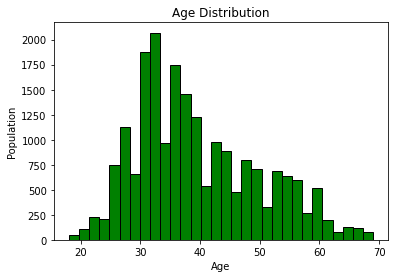

In [ ]:
plt.hist(df['Alter'], color = 'green', edgecolor = 'black',bins = 30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Population')

Wir zeichnen das Histogramm für die Altersverteilung. Auf diese Weise können wir sehen, in welcher Altersgruppe die Kunden in unserer Bank häufiger sind. Wir geben an, dass wir ein Histogramm mit der Funktion plt.hist zeichnen, die darin enthaltenen Werte sind verständlich, nur der Bins-Wert ist wichtig und es wird bestimmt, in wie viele Teile dieses Histogramm unterteilt wird.

Yaş dağılımına ait histogramı çiziyoruz. Bu sayede bankamızdaki müşterilerin hangi yaş aralığında daha sık olduğunu görebiliyoruz. plt.hist fonksiyonu ile histogram çizeceğimizi belirtiyoruz, içerisindeki değerler ise anlaşılır sadece bins değeri önemli o da bu histogramın kaç parçaya bölüneceğini belirliyor.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


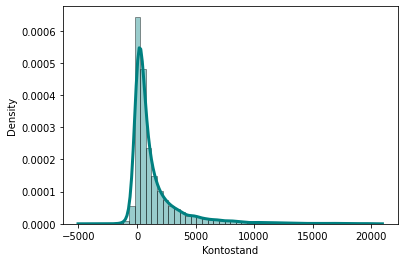

In [ ]:
sns.distplot(df['Kontostand'], hist=True, kde=True, 
             bins=50, color = 'teal', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

Hier zeichnen wir die Grafik, die die Dichte des Geldbetrags auf dem Bankkonto zeigt. Wenn .distplot, zeichnen wir den Dichtediagramm. Je größer der Wert unserer Behälter ist, desto reibungsloser und realistischer werden sie. Wenn hist = True, werden die Säulendiagramme gezeichnet, wenn kde = True, wird das Liniendiagramm darauf gezeichnet. Wir müssen die Werte hist und kde verwenden, um die Eigenschaften der Grafik wie Farbe, Fettdruck usw. zu erreichen.

Burada da banka hesabındaki para miktarının yoğunluğunu gösteren grafiği çiziyoruz. .distplot ise yoğunluk grafiğini çiziyoruz. Daha düzgün ve gerçekçi olması adına bins değerimizi ne kadar büyük yaparsak o kadar iyi aslında. hist = True olduğunda sütun grafiklerini çiziyor, kde = True olduğunda da üzerindeki çizgi grafiğini çiziyor. Grafiğin renk, kalın vb özelleriklerine ulaşabilmemiz için hist ve kde değerlerini kullanmamız gerekiyor.


In [ ]:
df[(df['Label'] == 1) & (df['Alter'] < 30) & (df['Ausbildung'] == 'Hochschulabschluss') & (df['Kontostand'] > 1000)].head()

,Alter,Beruf,Familienstand,Ausbildung,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label
1414,27,Techniker,verheiratet,Hochschulabschluss,0,10451,1,0,45,1
2254,28,unbekannt,ledig,Hochschulabschluss,0,1287,1,0,65,1
2746,27,Techniker,ledig,Hochschulabschluss,0,15161,0,0,74,1
3085,29,unbekannt,verheiratet,Hochschulabschluss,0,1441,1,0,80,1
4118,24,Student,ledig,Hochschulabschluss,0,3415,0,0,97,1


Es ist für uns sehr einfach, die uns vorliegenden Daten gemäß den spezifischen Einschränkungen der Bank oder des Kunden zu manipulieren. Wir können einen neuen Datensatz gemäß den mit nur einer Codezeile angegebenen Einschränkungen erstellen.

Banka veya müşteri tarafından verilen spesifik kısıtlamara göre elimizdeki datalarla oynamamız çok basit. Sadece 1 satır kod ile verilen kısıtlamalara göre yeni bir data set oluşturabiliriz.

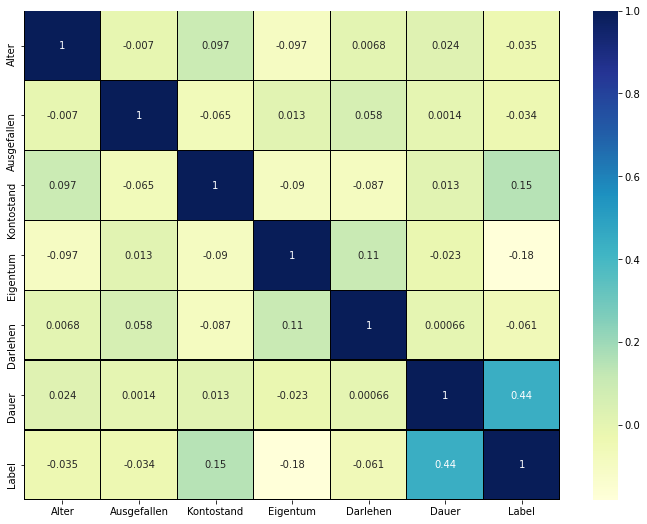

In [ ]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidth= 0.2,
            linecolor = 'black',
            annot = True,
            cmap="YlGnBu",
            )

Wenn wir die Korrelationsbeziehung zeigen. annot = True => drucke die Werte auf jedes Quadrat, cmap ist die Farbe der Matrix. Die Grafik zeigt die Beziehung zwischen den 7 Werten in unserem Datensatz mit oder ohne indirektem Wert.

Korelasyon ilişikisini gösterecek olursak. annot = True => her kare üzerindeki değerleri yazar, cmap matris'in rengi. Data setimizdeki 7 adet değerinin birbiri ile dolaylı ya da dolaylı olmadan oluşan ilişkisini gösteren grafik

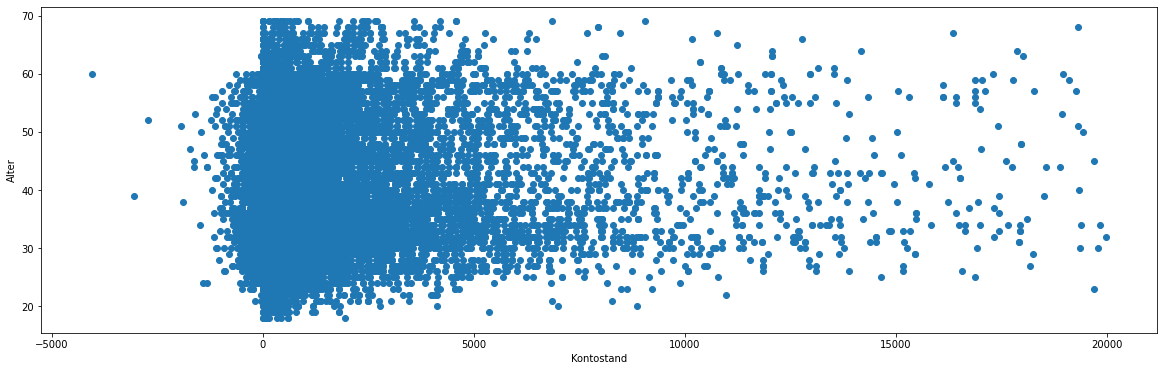

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(df['Kontostand'], df['Alter'])
ax.set_xlabel('Kontostand')
ax.set_ylabel('Alter')
plt.show()

Streudiagramm, das für das Alter und den Geldbetrag auf dem Bankkonto gezeichnet wird. Dies sind zwei verschiedene Werte in unserem Datensatz.

Data setimizdeki 2 farklı değer olan yaş ve banka hesabında bulunan para miktarı için çizilmiş Scatter plot yani Serpilme diyagramı

## Data Preprocessing

In [ ]:
df.iloc[:5].values

array([[31, 'Freiberufler', 'verheiratet', 'Allgemeine Hochschulreife',
        0, 162, 1, 1, 0, 1],
       [28, 'Beamter', 'verheiratet', 'Allgemeine Hochschulreife', 0,
        1595, 0, 0, 1, 0],
       [39, 'Techniker', 'geschieden', 'Allgemeine Hochschulreife', 0,
        17441, 1, 1, 1, 1],
       [54, 'Arbeitslos', 'geschieden', 'Allgemeine Hochschulreife', 0,
        925, 0, 0, 2, 0],
       [24, 'Techniker', 'ledig', 'Allgemeine Hochschulreife', 0, -156,
        1, 0, 4, 0]], dtype=object)

Mit .iloc können wir Werte von n bis m untersuchen. Um mit den Werten zu arbeiten, die wir haben, benötigen wir numerische Daten, aber wie wir sehen, haben Beruf, Familienstand, Ausbildung Daten vom Typ String.

.iloc sayesinde n'den m'ye kadar giden değerleri kolaylıkla inceleyebiliriz. Elimizdeki değerlerle çalışmak için numerik verilere sahip olmamız gerekli ancak gördüğümüz gibi Beruf, Familienstand, Ausbildung string türünde verilere sahip

In [ ]:
label_encoder = LabelEncoder()
df['Beruf'] = label_encoder.fit_transform(df['Beruf'])
df['Familienstand'] = label_encoder.fit_transform(df['Familienstand'])
df['Ausbildung'] = label_encoder.fit_transform(df['Ausbildung'])
df.head()

,Alter,Beruf,Familienstand,Ausbildung,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label
0,31,3,2,0,0,162,1,1,0,1
1,28,2,2,0,0,1595,0,0,1,0
2,39,9,0,0,0,17441,1,1,1,1
3,54,1,0,0,0,925,0,0,2,0
4,24,9,1,0,0,-156,1,0,4,0


Da wir 3 Spalten vom Typ String in Integer konvertiert haben, sind wir der Datenanalyse einen Schritt näher gekommen. Am Ende dieses Prozesses tritt jedoch ein solches Problem auf. Er wies verschiedene ganzzahlige Werte für verschiedene Arten von Jobs, Familienstand oder Bildungsstatus zu. Zum Beispiel hat der Familienstand den Wert 2 für verheiratet 1 für ledig zugewiesen. Mathematisch 2> 1, aber das bedeutet nicht, dass der Wert einer verheirateten Person höher ist als der einer einzelnen Person, aber der Computer weiß das nicht, daher müssen wir Dummy-Variablen verwenden.


String türünde olan 3 adet sütunu da integer'a çevirdiğimize göre veri inceleme işlemine bir adım daha yaklaşıyoruz. Lakin bu işlem sonunda şöyle bir sorun oluşuyor. Farklı türde işler, medeni durumlar veya öğrenim durumları için farklı integer değerleri atadı. Örneğin Familienstandda verheiratet için 2 ledig için 1 değerini atadı. Matematiksel olarak 2>1 ama bu evli bir bireyin değerinin bekar bir insandan daha yüksek olduğu anlamına gelmiyor ama bilgisayar bunu bilmiyor, o yüzden dummy variableları kullanmamız gerekiyor.

In [ ]:
dummy = pd.get_dummies(df['Beruf']).astype(int)
dummy2 = pd.get_dummies(df['Familienstand'])
dummy3 = pd.get_dummies(df['Ausbildung'])
dummy

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20488,1,0,0,0,0,0,0,0,0,0,0
20489,0,0,0,0,0,0,0,0,0,1,0
20490,0,0,0,0,0,0,0,0,0,1,0
20491,1,0,0,0,0,0,0,0,0,0,0


Aus dem oben genannten Grund müssen wir mit den uns gegebenen ganzen Zahlen spielen. Auch hier hilft uns eine Dummy-Variable. Der Prozess weist den Wert der Zeichenfolge der Person in der Spalte kurz dem Wert der Zeichenfolge zu, den verbleibenden Teilen Beruf / Familienstand / Bildung 1 und 0. Mit diesem Prozess werden Situationen wie die Überlegenheit eines Berufs gegenüber einem anderen beseitigt.

Yukarıda belirtilen sebepten dolayı bir şekilde bizlere verilmiş olan integerlarla oynamamız gerekiyor. Burada da yardımımıza dummy variable yetişiyor. Yapılan işlem kısaca Sütundaki kişi hangi değerdeki stringe sahipse o mesleği/medeni halini/eğitimi 1 geri kalan kısımlara 0 değerini atıyor. Bu işlem sayesinde bir mesleğin diğerine üstünlüğü vb gibi durumlar ortadan kalkıyor.

In [ ]:
df = pd.concat([df,dummy, dummy2, dummy3], axis = 1)
df.head()

,Alter,Beruf,Familienstand,Ausbildung,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label,0,1,2,3,4,5,6,7,8,9,10,0,1,2,0,1,2,3
0,31,3,2,0,0,162,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,28,2,2,0,0,1595,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,39,9,0,0,0,17441,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,54,1,0,0,0,925,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,24,9,1,0,0,-156,1,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0


Hier fügen wir die 3 von mir erstellten Dummy-Datensätze zu dem von uns verwendeten Datensatz hinzu. Nachdem wir die angegebenen Spalten in die gewünschte Form konvertiert haben, müssen wir diese Spalten entfernen.

Burada ise oluşturduğum 3 adet dummy data setini kullanmakta olduğumuz data sete ekliyoruz. Belirtilen sütunları istediğimiz şekle dönüştürdüğümüze göre bu sütunlardan kurtulmamız gerekiyor.

In [ ]:
df.drop(['Beruf','Familienstand','Ausbildung'], axis =1 )

,Alter,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label,0,1,2,3,4,5,6,7,8,9,10,0,1,2,0,1,2,3
0,31,0,162,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,28,0,1595,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,39,0,17441,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,54,0,925,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,24,0,-156,1,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20488,53,0,5603,0,0,2372,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
20489,50,0,2,0,0,2389,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
20490,41,0,650,1,0,2420,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
20491,43,0,3064,1,0,2453,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


Nach dem Hinzufügen von Spalten mit 1 und 0 anstelle dieser 3 Werte sind wir mit diesen Werten fertig.

Bu 3 değer yerine 1 ve 0 içeren sütunları ekledikten sonra bu değerler ile işimiz bitti.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Label','Beruf','Familienstand','Ausbildung'], axis = 1)
y = df['Label']

Wir benötigen die x- und y-Werte, um unseren Datensatz auszuführen. Da unsere unabhängige Variable, nämlich unser Zielwert, der 'Label' Wert ist, müssen wir ihn löschen. (Die anderen drei werden oben gelöscht, aber wir müssen ihn hier löschen, da er nicht aufgezeichnet wird.)

Data setimizi çalıştıracağımız x ve y değerlerine ihtiyacımız var. Bağımsız değişkenimiz yani hedef değerimiz label değeri olduğu için bunu droplamamız lazım.(Diğer üçlü üstte droplanıyor ama kayıt edilmediği için burada da droplamamız lazım)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_test ist der Teil, den wir in den Algorithmus einfügen und lehren werden, X_train ist der Teil, an dem dieser Algorithmus arbeiten wird, y_train ist der Teil mit abhängigen Variablen, die sich auf X_train beziehen, und y_test ist der Teil, an dem sich die abhängigen Variablen beziehen, die sich auf X_test beziehen. test_size = nimmt einen Wert zwischen 0 und 1 an und bestimmt entsprechend dem Wert, der verwendet wird, wie viel Prozent dieses Datensatzes funktionieren.

X_test algoritmaya sokup öğreteceğimiz kısım, X_train bu algoritmanın üzerinde çalışacağı kısmı, y_train X_train ile alakalı bağımlı değişkenlerin olduğu kısım, y_test de X_test ile alakalı bağımlı değişkenlerin olduğu kısım. test_size= 0 ve 1 arasında 1 değer alır aldığı değere göre bu data set'in % kaçı ile çalışacağını belirler

In [ ]:
X_train.shape

(14343, 24)

In [ ]:
X_train

,Alter,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,0,1,2,3,4,5,6,7,8,9,10,0,1,2,0,1,2,3
5165,44,0,3060,1,0,113,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3462,28,0,205,0,0,87,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
8972,44,0,12392,1,0,177,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
9993,41,0,243,1,0,199,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
19897,47,0,86,0,0,1086,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20297,49,0,3,0,1,1439,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5400,31,0,623,0,0,117,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
18769,32,0,562,1,0,722,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
5418,26,0,5005,0,1,117,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


Als letzten Schritt müssen wir Feature Scalling durchführen. Wie aus der Tabelle hervorgeht, gibt es in der Bank einen Größenunterschied zwischen Alter und Geld. Zum Beispiel gibt es gravierende Unterschiede zwischen dem Alter von 34 bis 37 und dem Geld zwischen 171 und 681. Ein Wert kann den anderen Wert dominieren, wir müssen dies vermeiden. Dies ist in unserem Algorithmus problematisch, da die meisten Algorithmen für maschinelles Lernen euklidische Entfernungen verwenden. Wir müssen diese Werte erneut skalieren.

Son Adım olarak ise Feature Scalling yani Özellik Ölçeklendirme yapmamız lazım. Tablodan da görüldüğü üzere Yaş ve Bankadaki para arasında ölçek farkı var. Örneğin Yaşlar arasında 34 - 37, Para arasında 171 - 681 ciddi farklar var. Bir değer diğer değeri domine edebilir bunun önüne geçmemiz lazım. Bu algoritmamızda sıkıntı yaratıcak çünkü çoğu makine öğrenmesi algoritması öklid mesafesi kullanılır. Bu değerleri tekrar ölçeklendirmemiz lazım

![picture](https://hackernoon.com/hn-images/1*Ud6qCIDqDEn5k_q3YTaP1g.png)

In [ ]:
X_test.shape

(6147, 24)

In [ ]:
y_train.shape

(14343,)

In [ ]:
y_test.shape

(6147,)

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler()

In [ ]:
X_train = standard_X.fit_transform(X_train)
X_test = standard_X.fit_transform(X_test)

Es gibt auch 3 Skalen, wenn wir uns Wikipedia ansehen
- Min-Max-Normalisierung
- mittlere Normalisierung
- Standardisierung

Wikipedia'dan da baktığımız da 3 adet yeniden ölçeklendirme var 
- min-max normalization
- mean normalization
- standardization

![picture](https://www.oreilly.com/library/view/hands-on-machine-learning/9781788393485/assets/7a9d8cb9-10f7-43b5-b52f-865fbbb0b69e.png)



Xscale = neuer x-Wert
x = unser Wert in der Tabelle
Mittelwert = Mittelwert des x-Wertes
df = Standardabweichung
Wendet diese Formel für jeden Wert in dieser Operation an.


Xscale = yeni x değeri
x = tablodaki değerimiz
mean = x değerinin ortalaması
sd = standart sapma
Bu formülü bu işlemde her bir değer için uygular

In [ ]:
X_train.shape

(14343, 24)

In [ ]:
X_train

array([[ 0.43524922, -0.11399679,  0.67769835, ..., -0.69185244,
        -0.38050506, -0.20380521],
       [-1.11727067, -0.11399679, -0.51562897, ..., -0.69185244,
        -0.38050506, -0.20380521],
       [ 0.43524922, -0.11399679,  4.5782695 , ...,  1.44539492,
        -0.38050506, -0.20380521],
       ...,
       [-0.7291407 , -0.11399679, -0.36641081, ..., -0.69185244,
        -0.38050506, -0.20380521],
       [-1.31133566, -0.11399679,  1.49066566, ..., -0.69185244,
        -0.38050506, -0.20380521],
       [-0.63210821, -0.11399679, -0.37435239, ..., -0.69185244,
        -0.38050506, -0.20380521]])

Wie Sie sehen, hat sich die Anzahl unserer Daten nicht geändert, aber unsere Werte wurden standardisiert, damit wir ein genaueres Ergebnis erhalten.

Görüldüğü üzere datamızın sayısında herhangi bir değişme olmadı ama değerlerimize Standardizasyon uygulandı böylece daha doğru bir oranda sonuç elde edebileceğiz

## Modelling


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state= 4711, n_estimators=200,max_depth=4)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4711,
                       verbose=0, warm_start=False)

In diesem Schritt nennen wir den Random Forest-Algorithmus, den wir bei der Modellierung verwenden werden. random_state = weist an, mit dem Lesen der Daten aus der darin zugewiesenen Zeile zu beginnen, nicht aus der ersten Zeile. n_estimators = bestimmt die Anzahl der Bäume in unserem Algorithmus, dh die Anzahl der Beobachter. Der Parameter zeigt die Verzweigung des Suchbaums max_depth

Bu adımda modellemede kullanacağımız algoritma olan random forest algoritmasını çağırıyoruz. random_state = datayı okumaya 1. satırdan değil de içine atanan satırdan başlanmasını söylüyor, n_estimators= algoritmamızdaki ağaç sayısını yani gözlemci sayısını belirler, max_depth search tree'nin dallanmasını gösteren parametre

In [ ]:
model_rf.score(X_test,y_test)

0.7615096795184643

Es zeigt die prozentuale Erfolgsrate unseres Modells nach seiner Inbetriebnahme. Accuracy zeigt unsere Beständigkeit.

Verilen modelimizin işleme sokulduktan sonra % kaç başarı ile çalıştığını gösterir. Accuracy yani tutarlılığımızı gösteriyor.

In [ ]:
y_predicted = model_rf.predict(X_test)


In diesem Schritt setzen wir das erwartete Ergebnis in y_predicted.

Bu adımda aslında çıkması gereken sonucu y_predicted yani önceden beklenen değer içine atıyoruz

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[4657,    4],
       [1462,   24]])

In diesem Schritt sehen wir, wie unsere Matrix die erwarteten und empfangenen Ergebnisse vergleicht.

Bu adımda hata matrisimizin beklenen ve alınan sonucu karşılaştırmasını görüyoruz

Text(69.0, 0.5, 'Truth')

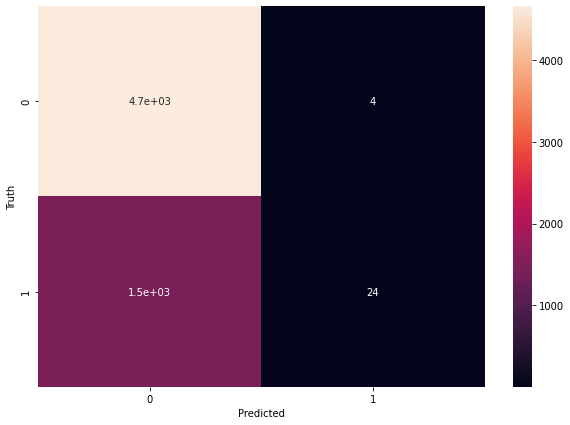

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Der Modellierungsprozess ist ein wichtiger Schritt, damit wir sehen können, welches Modell für den gewünschten Job am besten geeignet und welches konsistenter ist.

Modelling işlemi önemli bir adım, bu sayede istenilen işe en uygun modelin hangisi olduğu ve hangisinin daha tutarlı olup olmadığını görebiliriz.

In [ ]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'linear', random_state=4711)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test) 

Support-Vektor-Maschinen sind überwachte Lernmodelle mit zugehörigen Lernalgorithmen, die Daten für die Klassifizierungs- und Regressionsanalyse analysieren. Der Prozess, den wir hier durchführen, besteht darin, eine andere Modellierung gemäß den uns gegebenen Daten zu messen. Was wir in y_pred_svm tun, ist die Bestimmung des Abstands jeder der Daten in X_test zu den Daten in der Ebene, die wir über entscheidungsfunktion durchgeführt haben.

Destek vektör makineleri, sınıflandırma ve regresyon analizi için verileri analiz eden ilişkili öğrenme algoritmalarına sahip denetimli öğrenme modelleridir. Burada yaptığımız işlem ise bir başka modellemeyi bize verilen datasete uygunluğunu ölçmektir. y_pred_svm'de yaptığımız şey X_testteki verilerinin her birisininin decision_function aracılığı ile yapmış olduğumuz düzlemdeki verilere olan uzaklığının tespitidir.

Visualisierung der Matrix, die wir im vorherigen Schritt gezeichnet haben

Bir önceki adımda çizmiş olduğumuz matrisin görselleştirilmiş hali

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

Wir wenden den gleichen Prozess wie oben für eine andere Form der Modellierung an, die logistische Regression.

Yukarıda yaptığımız işlemin aynısını bir diğer modelleme biçimi olan Lojistik Regresyon için uyguluyoruz

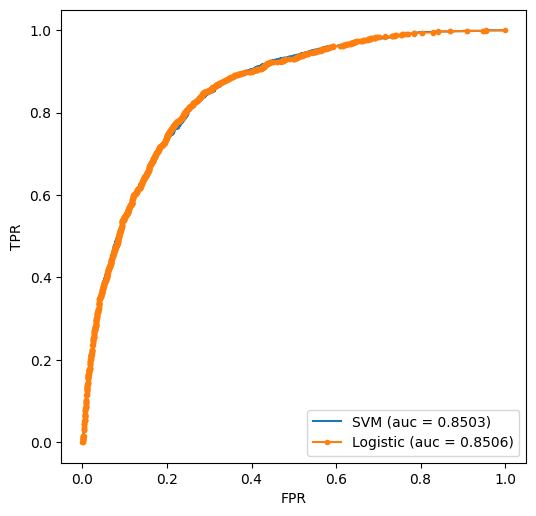

In [ ]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, treshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, treshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)



plt.figure(figsize=(6,6), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label= 'SVM (auc = %0.4f)' %auc_svm )
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.4f)' % auc_logistic)



plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show()

TPR wird verwendet, um den Prozentsatz der korrekt identifizierten echten Positiven zu messen.
FPR ist die Wahrscheinlichkeit, die Nullhypothese für einen bestimmten Test falsch abzulehnen.
Die Klassifizierung kann unter der Bedingung erfolgen, dass sie bei einem bestimmten Wert, der als Schwellenwert bezeichnet wird, unter oder über diesem Wert liegt.
Das von uns kurz gezeichnete ROC-Diagramm entspricht dem für jeden Trashold-Wert erstellten Verwirrungsmatrixwert.
Der AUC-Wert entspricht der Fläche unter dem gezeichneten Diagramm. Mit anderen Worten, je genauer unser Diagramm gezeichnet wird, desto höher ist unser auc-Wert aufgrund der Fläche. Dies gilt auch für das Gegenteil. Je größer unser auc-Wert ist, desto genauer ist das von uns gezeichnete Diagramm.
Im ersten Schritt vergleichen wir zunächst die beiden reellen Werte, die wir zur Bestimmung dieser beiden Werte erhalten haben.
Im nächsten Schritt wird die Fläche unter diesem Diagramm berechnet. Je größer das Ergebnis, desto genauer die Antwort.




TPR doğru şekilde tanımlanan gerçek pozitiflerin yüzdesini ölçmek için kullanılır.
FPR belirli bir test için boş hipotezin yanlış bir şekilde reddedilme olasılığıdır.
Treshold dediğimiz de belirlenilen bir değerde bu değerin altında veya üstünde olması durumuna göre sınıflandırma yapılabilir.
Çizdğimiz ROC grafiği kısaca her bir trashold değeri için oluşturulan confusion matrix değerine denk gelir
AUC değeri çizilen grafiğin altında kalan alana tekabül eder. Yani çizilen grafiğimiz ne kadar doğruysa alan dolayısıyla auc değerimiz büyür aynı şey tam tersi için de geçerlidir auc değerimiz ne kadar büyükse çizdiğimiz grafik o kadar doğrudur diyebiliriz.
ilk adımda bu 2 değerin belirlenmesi için elde ettiğimiz ve gerçek olan 2 değerin karşılaştırması ile başlarız.
Diğer adımda yapılan işlem ise bu çizdiğimiz grafiğin altında kalan alanı hesaplama işlemidir. Sonuç ne kadar büyükse yanıt o kadar doğrudur


In [ ]:
model_rf.score(X_test,y_test)

0.7615096795184643

In [ ]:
auc_logistic

0.8505572860103439

In [ ]:
auc_svm

0.8503039019982831

Gemäß den 3 angegebenen Modellen sehen wir, dass die erfolgreichste Modellierung der SVM-Algorithmus und der erfolgloseste Algorithmus die zufällige Gesamtstruktur ist. Die Fortsetzung des SVM-Algorithmus zeigt daher, dass wir das gewünschte Ergebnis besser erzielen können.

Verilen 3 adet modellemeye göre en başarılı modellemenin SVM algoritması, en başarısız algoritmanın ise random forest olduğunu görürüz. Bu yüzden SVM algoritması ile devam etmemiz istenen sonucu daha iyi yakalayabileceğimizi gösteriyor.

## Evaluation

Im Modellierungsteil war unser effizientester Algorithmus der SVM-Algorithmus. Bei diesem Algorithmus wird jedes Datenelement als Punkt im n-dimensionalen Raum zusammen mit dem Wert jeder Eigenschaft, die der Wert einer bestimmten Koordinate ist, dargestellt. Dann wird die Klassifizierung durchgeführt, indem die Hyperebene gefunden wird, die sich recht gut von den beiden Klassen unterscheidet. In der 2D-Ebene unterscheiden sich die dreidimensionale Vektorebene und die n-dimensionale Hyperebene. Während es visuell möglich ist, die Abstände in zwei- und dreidimensionalen Ebenen zu zeichnen, können wir sie nur in n Dimensionen mathematisch beschreiben.

Modelling kısmında en verimli algoritmamız SVM algoritması çıkmıştı. Bu algoritmada, her bir veri maddesini belirli bir koordinatın değeri olan her özelliğin değeri ile birlikte n-boyutlu boşluğa bir nokta olarak çizilir. Ardından, iki sınıftan oldukça iyi ayrım yapan hiper-düzlemi bularak sınıflandırma gerçekleştirilir. 2 Boyutlu düzlemde ayrımı yapan şey vektör, 3 boyutlu da düzlem, n boyutlu da hiper - düzlemdir. 2 ve 3 boyutlu düzlemde ayrımları çizmek görsel olarak mümkünken n boyutlu da ancak matematiksel olarak tasvir edebiliriz.

In [ ]:
df0 = df.loc[df['Label'] == 0]
df1 = df.loc[df['Label'] == 1]
df1.head()

,Alter,Beruf,Familienstand,Ausbildung,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label,0,1,2,3,4,5,6,7,8,9,10,0,1,2,0,1,2,3
0,31,3,2,0,0,162,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,39,9,0,0,0,17441,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
164,23,1,1,2,0,1003,0,0,8,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
181,44,1,2,1,0,17747,1,0,8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
268,36,10,2,1,0,14462,1,0,10,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0


Unser Operationsergebnis besteht darin, jeden Wert in der Ebene zu platzieren, in der unser Zielwert 1 und 0 ist, und diese Daten auf die erfolgreichste Weise zu teilen.

Burada yaptığımız işlem sonucumuz yani target değerimizin 1 ve 0 olduğu durumlardaki her bir değeri düzleme yerleştirmek ve yerleştirdiğimiz bu verileri en başarılı şekilde bölmektir.

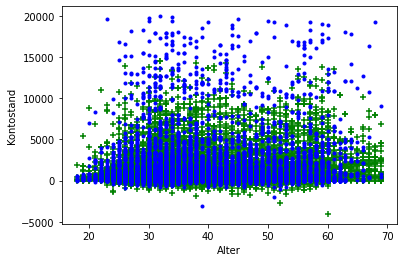

In [ ]:
%matplotlib inline
plt.xlabel('Alter')
plt.ylabel('Kontostand')
plt.scatter(df0['Alter'], df0['Kontostand'], color = 'green', marker='+')
plt.scatter(df1['Alter'], df1['Kontostand'], color = 'blue', marker='.')

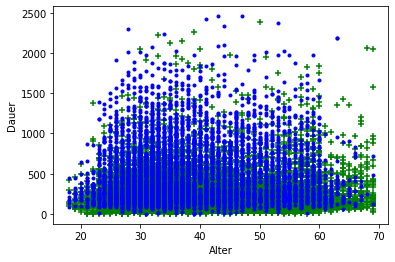

In [ ]:
plt.xlabel('Alter')
plt.ylabel('Dauer')
plt.scatter(df0['Alter'], df0['Dauer'], color = 'green', marker='+')
plt.scatter(df1['Alter'], df1['Dauer'], color = 'blue', marker='.')

Wie in den beiden obigen Beispielen zu sehen ist, werden unsere Daten auf einer zweidimensionalen Ebene platziert. Es ist sehr schwierig für uns, eine sichtbare Unterscheidung zu treffen, da wir so viele Daten haben. Wenn jedoch den x- und y-Dimensionen eine zusätzliche z-Dimension hinzugefügt wird, ist die Unterscheidung möglicherweise einfacher.

Yukarıdaki 2 örnekte görüldüğü üzere verilerimiz 2 boyutlu düzlem üzerine yerleştirilmiştir. Elimizde çok fazla veri bulunduğu için şuanda gözle görülebilir bir ayrım yapmamız çok zor. Lakin x ve y boyutuna ekstra olarak belki z boyutu da eklenirse ayrımı yapmak kolaylaşabilir.

In [ ]:
# X = df.drop(['Label','Beruf','Familienstand','Ausbildung'], axis = 1)
# y = df['Label']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Tatsächlich sind die obigen Operationen nicht auf diese beiden Prozesse beschränkt, aber es wäre sinnlos, sie hier erneut zu schreiben, da die auszuführenden Operationen bereits im Vorverarbeitungsabschnitt ausgeführt werden.

Aslında yukarıda yapılan işlemler bu iki işlem ile sınırlı değildir ama zaten yapılacak olan işlemler preprocessing kısmında yapıldığı için tekrar buraya yazmak anlamsız olur.

In [ ]:
from sklearn.svm import SVC
model = SVC(random_state=4711)

In [ ]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=4711, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model.score(X_test,y_test)

0.8151944037741988

In [ ]:
y_predicted = model.predict(X_test)

Wir müssen die Bibliothek des Algorithmus importieren, mit dem wir arbeiten werden. Nach dem Import dieser Bibliothek platzieren wir unsere Werte in den erforderlichen Funktionen, wenn wir die zufällige Gesamtstruktur verwenden.
Wenn wir uns model.score ansehen, sehen wir, dass wir ein besseres Ergebnis erzielen als der Random Forest-Algorithmus.

Çalışacağımız algoritmaya ait kütüphaneyi importlamamız gerekli. Bu kütüphaneyi importladıktan sonra random forestta kullandığımız gibi değerlerimizi gerekli fonksiyonların içine yerleştiriyoruz.
model.score'a baktığımızda ise random forest algoritmasından daha iyi bir sonuç elde ettiğimizi görüyoruz.

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_predicted)
cm2

array([[4472,  189],
       [ 947,  539]])

Text(69.0, 0.5, 'Truth')

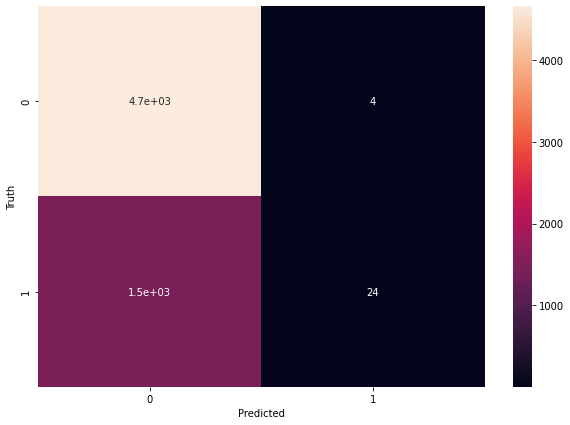

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Wieder können wir die confusion-matrix sehen, die wir hier erstellt haben.

Yine oluşturmuş olduğumuz confusion matrix'i burada görebiliriz.

## Deployment


In diesem Schritt wird das Modell für neue Daten außerhalb des Datensatzes und von neuen Stakeholdern verwendet. Neue Interaktionen in dieser Phase können neue Variablen und Anforderungen für den Datensatz und das Modell aufzeigen. Aus diesem Grund kann der zu Beginn ermittelte Änderungsbedarf bei den Geschäftsanforderungen auftreten und der Prozess kann aufgrund des Änderungsbedarfs von vorne beginnen.

Bu adımda, model, veri kümesinin kapsamı dışındaki yeni verilerde ve yeni paydaşlar tarafından kullanılır. Bu aşamadaki yeni etkileşimler, veri kümesi ve modeli için yeni değişkenleri ve ihtiyaçları ortaya çıkarabilir. Bu sebeple en başta belirlenmiş olan iş ihtiyaçlarında değişiklik ihtiyacı ortaya çıkabilir ve süreç değişiklik ihtiyaçları sebebi ile yeniden başlayabilir.

Wir benötigen andere Daten als wir, die dem gleichen Zweck dienen, aber wir haben diese Daten derzeit nicht.

Aynı amaca hizmet eden elimizdekinden farklı verilere ihtiyacımız var lakin şuanda bizde bu veriler yok